In [1]:
import torch
import random
import matplotlib.pyplot as plt

c:\Users\mmocak\PycharmProjects\machine-learning-circus\.venv\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.utils import subgraph

citeseer_dataset = Planetoid(root = "Citeseer_dataset", name = "Citeseer", transform = NormalizeFeatures())

In [3]:
data = citeseer_dataset[0]

# Create a mask for nodes whose label is either 0 or 1
mask = (data.y == 0) | (data.y == 1)
filtered_node_indices = mask.nonzero(as_tuple=False).view(-1)

# Extract the subgraph that contains only the filtered nodes. 
# The parameter relabel_nodes=True updates node indices accordingly.
edge_index, edge_attr = subgraph(filtered_node_indices, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)

# Create a new data object for the filtered graph
filtered_data = data.__class__()
filtered_data.x = data.x[filtered_node_indices]
filtered_data.y = data.y[filtered_node_indices]
filtered_data.edge_index = edge_index
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    filtered_data.edge_attr = edge_attr

num_nodes = filtered_data.num_nodes
torch.manual_seed(42)
indices = torch.randperm(num_nodes)

train_end = int(0.6 * num_nodes)
val_end = int(0.8 * num_nodes)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_end]] = True
val_mask[indices[train_end:val_end]] = True
test_mask[indices[val_end:]] = True

filtered_data.train_mask = train_mask
filtered_data.val_mask = val_mask
filtered_data.test_mask = test_mask

filtered_citeseer_dataset = filtered_data


In [4]:
print(len(filtered_citeseer_dataset))
#print(filtered_citeseer_dataset.num_classes)
print(filtered_citeseer_dataset.num_features)
citeseer_graph = filtered_citeseer_dataset
citeseer_graph

6
3703


Data(x=[854, 3703], y=[854], edge_index=[2, 1320], train_mask=[854], val_mask=[854], test_mask=[854])

In [5]:
citeseer_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [6]:
print("Training samples: ", citeseer_graph.train_mask.sum().item())
print("Validation samples: ", citeseer_graph.val_mask.sum().item())
print("Test samples: ", citeseer_graph.test_mask.sum().item())

Training samples:  512
Validation samples:  171
Test samples:  171


In [7]:
citeseer_graph.y

tensor([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
print(f'Number of nodes: {citeseer_graph.num_nodes}')
print(f'Number of edges: {citeseer_graph.num_edges}')
print(f'Average node degree: {citeseer_graph.num_edges / citeseer_graph.num_nodes:.2f}')
print(f'Has isolated nodes: {citeseer_graph.has_isolated_nodes()}')
print(f'Has self-loops: {citeseer_graph.has_self_loops()}')
print(f'Is undirected: {citeseer_graph.is_undirected()}')

Number of nodes: 854
Number of edges: 1320
Average node degree: 1.55
Has isolated nodes: True
Has self-loops: False
Is undirected: True


We swap out all GCNConv instances with GATConv layers that make use of attention. Building a 2-layer GAT model that makes use of 8 attention heads in the first layer and 1 attention head in the second layer , also using  a dropout ratio of 0.6 inside and outside each GATConv call, and  a hidden_channels dimensions of 8 per head. Document link-
https://towardsdatascience.com/graph-attention-networks-in-python-975736ac5c0c

In [9]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import  GATConv

class GAT(torch.nn.Module):
    def __init__(self, input_channels, output_channels, hidden_channels = 8, num_heads = 8):
        super().__init__()
        torch.manual_seed(123456)
        
        self.gatconv1 = GATConv(
            in_channels = input_channels, 
            out_channels = hidden_channels, 
            heads = num_heads
        )
        
        self.gatconv2 = GATConv(
            in_channels = hidden_channels * num_heads, 
            out_channels = output_channels, 
            heads = 1
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = F.dropout(x, p = 0.6, training = self.training)
        
        x = self.gatconv1(x, edge_index)
        x = F.elu(x)
        
        x = F.dropout(x, p = 0.6, training = self.training)
        x = self.gatconv2(x, edge_index)
        
        return x
    

    def predict_proba(self, data):
        # forward Method: Computes the raw logits (unscaled scores) for each class.
        # predict_proba Method: Applies the softmax function to the logits to convert them into probabilities.

        # Apply softmax to get probabilities
        logits = self.forward(data)
        probabilities = F.softmax(logits, dim=1)
        return probabilities

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

citeseer_graph = filtered_citeseer_dataset.to(device)

input_channels = filtered_citeseer_dataset.num_features

# hidden_channels = 32
hidden_channels = 8

output_channels = 2

In [11]:
model = GAT(
    input_channels = input_channels, 
    output_channels = output_channels
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.005, weight_decay = 5e-4)

criterion = nn.CrossEntropyLoss()

In [12]:
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

Number of parameters:  237318


In [13]:
%%time
num_epochs = 200

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    
    out = model(citeseer_graph)
    
    loss = criterion(out[citeseer_graph.train_mask], citeseer_graph.y[citeseer_graph.train_mask])
    loss.backward()
    
    optimizer.step()
    
    # Get predictions on the training data
    pred_train = out.argmax(dim = 1)
    
    correct_train = (
        pred_train[citeseer_graph.train_mask] == citeseer_graph.y[citeseer_graph.train_mask]
    ).sum()
    
    acc_train = int(correct_train) / int(citeseer_graph.train_mask.sum())

    # Print training loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1:03d}, Train Loss: {loss:.3f}, Train Acc: {acc_train:.3f}")

Epoch: 010, Train Loss: 0.590, Train Acc: 0.684
Epoch: 020, Train Loss: 0.533, Train Acc: 0.684
Epoch: 030, Train Loss: 0.479, Train Acc: 0.785
Epoch: 040, Train Loss: 0.431, Train Acc: 0.801
Epoch: 050, Train Loss: 0.382, Train Acc: 0.869
Epoch: 060, Train Loss: 0.360, Train Acc: 0.873
Epoch: 070, Train Loss: 0.334, Train Acc: 0.889
Epoch: 080, Train Loss: 0.318, Train Acc: 0.883
Epoch: 090, Train Loss: 0.294, Train Acc: 0.902
Epoch: 100, Train Loss: 0.288, Train Acc: 0.900
Epoch: 110, Train Loss: 0.278, Train Acc: 0.912
Epoch: 120, Train Loss: 0.295, Train Acc: 0.895
Epoch: 130, Train Loss: 0.266, Train Acc: 0.906
Epoch: 140, Train Loss: 0.286, Train Acc: 0.902
Epoch: 150, Train Loss: 0.278, Train Acc: 0.906
Epoch: 160, Train Loss: 0.254, Train Acc: 0.926
Epoch: 170, Train Loss: 0.251, Train Acc: 0.934
Epoch: 180, Train Loss: 0.261, Train Acc: 0.910
Epoch: 190, Train Loss: 0.230, Train Acc: 0.920
Epoch: 200, Train Loss: 0.251, Train Acc: 0.912
CPU times: total: 17 s
Wall time: 4.26 s

In [14]:
model.eval()

with torch.no_grad():
    pred = model(citeseer_graph).argmax(dim = 1)

    correct = (pred[citeseer_graph.test_mask] == citeseer_graph.y[citeseer_graph.test_mask]).sum()

    test_acc = int(correct) / int(citeseer_graph.test_mask.sum())

print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8187


In [15]:
# plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [16]:
from torch_geometric.utils import subgraph

# Extract test node indices from citeseer_graph
test_node_indices = citeseer_graph.test_mask.nonzero(as_tuple=False).view(-1)

# Extract a proper subgraph for test nodes with relabeled indices
test_edge_index, test_edge_attr = subgraph(test_node_indices, citeseer_graph.edge_index, relabel_nodes=True, num_nodes=citeseer_graph.num_nodes)

# Create a new test_data object with the subgraph information
test_data = citeseer_graph.__class__()
test_data.x = citeseer_graph.x[test_node_indices]
test_data.y = citeseer_graph.y[test_node_indices]
test_data.edge_index = test_edge_index
if hasattr(citeseer_graph, 'edge_attr') and citeseer_graph.edge_attr is not None:
    test_data.edge_attr = test_edge_attr

# Update num_nodes to match the filtered node features
test_data.num_nodes = test_data.x.size(0)
test_data

Data(x=[171, 3703], y=[171], edge_index=[2, 50], num_nodes=171)

AUC: 0.855


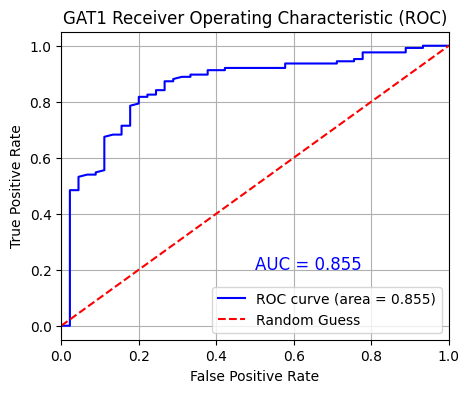

In [19]:
# Predict probabilities for the positive class
y_scores = model.predict_proba(test_data)[:, 1]
y_true = citeseer_graph.y[citeseer_graph.test_mask]

y_scores_array = y_scores.detach().numpy()
y_true_array = y_true.detach().numpy()

# plot ROC curve for the model
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    #print(fpr)  
    #rint(tpr)
    
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.3f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    # add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GAT1 Receiver Operating Characteristic (ROC)')

    # add AUC value to the plot
    plt.text(0.5, 0.2, 'AUC = {:.3f}'.format(roc_auc), fontsize=12, color='blue')
    plt.legend(loc='lower right')

    # print the AUC value
    print(f'AUC: {roc_auc:.3f}')


    plt.grid()
    
plot_roc_curve(y_true_array,y_scores_array)

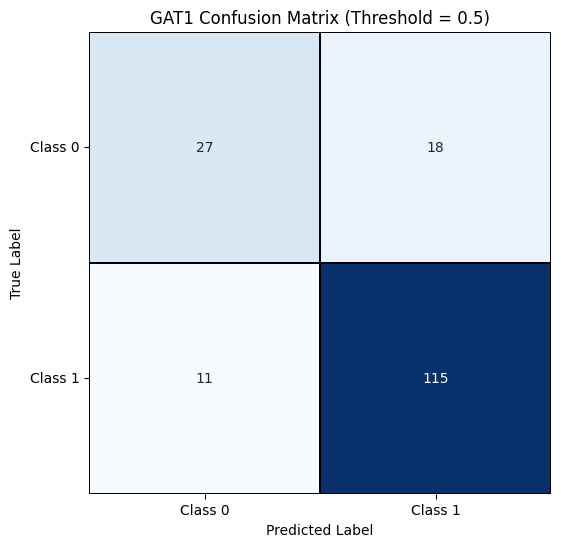

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the threshold for the positive class
threshold = 0.5

# Get probabilities for the positive class (y_scores is a tensor)
y_scores = model.predict_proba(test_data)[:, 1]
# Convert predicted probabilities tensor to numpy array after applying threshold
y_pred = (y_scores >= threshold).cpu().numpy().astype(int)

# Get true labels as a numpy array
y_true = test_data.y.cpu().numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
cm_df.index.name = 'True Label'
cm_df.columns.name = 'Predicted Label'
cm_df = cm_df.rename(index={0: 'Class 0', 1: 'Class 1'},
                     columns={0: 'Class 0', 1: 'Class 1'})

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, 
            linewidths=0.2, linecolor="black")
plt.title(f'GAT1 Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()